<a href="https://colab.research.google.com/github/ikbalsingh/cs276/blob/main/QuestionE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Node representation learning using Node2vec

#### Graph creation

The graph has directors as nodes and two directors are connected if they direct the same movie

#### Download dataset

In [ ]:
import requests
import zipfile
import os

def download_and_extract_zip(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Request was successful, save the content to a local .zip file
        with open("downloaded_file.zip", "wb") as file:
            file.write(response.content)

        # Extract the .zip file
        with zipfile.ZipFile("downloaded_file.zip", 'r') as zip_ref:
            zip_ref.extractall("C:\\Users\\admin\\Downloads\\276\\data")  # Extract the contents of the zip file to the current directory

        # Remove the downloaded .zip file
        os.remove("downloaded_file.zip")

        print(f"File extracted and saved.")
    else:
        print(f"Failed to download the .zip file. Status code: {response.status_code}")

# Usage
download_and_extract_zip("http://mozart.diei.unipg.it/gdcontest/contest2021/data/uploads/movie_remakes.zip")


File extracted and saved.


In [ ]:
import pandas as pd
remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_edges_df

C:\Users\admin\Downloads\276\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,director_original,director_remake,title_original,year_original,title_remake,year_remake
0,1,86,Don Juan,1926,Adventures of Don Juan,1948
1,48,46,Pépé le Moko,1937,Algiers,1938
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005
4,37,30,Little Mother,1935,Bachelor Mother,1939
...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966
98,32,21,The Women,1939,The Women,2008
99,32,17,The Women,1939,The Opposite Sex,1956
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955


In [ ]:
import pandas
remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_nodes_df

C:\Users\admin\Downloads\276\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name
0,1,Alan Crosland
1,2,Alfred Hitchcock
2,3,Andrew Davis
3,4,Andrew Grieve
4,5,Anthony Asquith
...,...,...
86,87,W. S. Van Dyke
87,88,Wilhelm Thiele
88,89,William A. Wellman
89,90,William Nigh


In [ ]:
movies_with_years_df = remakes_edges_df.copy()  # Create a copy of the original DataFrame

# Combine 'title_original' and 'year_original' into a new column
movies_with_years_df['original_title_and_year'] = movies_with_years_df['title_original'] + ' (' + movies_with_years_df['year_original'].astype(str) + ')'
movies_with_years_df['remake_title_and_year'] = movies_with_years_df['title_remake'] + ' (' + movies_with_years_df['year_remake'].astype(str) + ')'
movies_with_years_df['original_and_remake_movie'] = movies_with_years_df['original_title_and_year'] + ' -- ' + movies_with_years_df['remake_title_and_year'].astype(str) + ')'

movies_with_years_df

,director_original,director_remake,title_original,year_original,title_remake,year_remake,original_title_and_year,remake_title_and_year,original_and_remake_movie
0,1,86,Don Juan,1926,Adventures of Don Juan,1948,Don Juan (1926),Adventures of Don Juan (1948),Don Juan (1926) -- Adventures of Don Juan (1948))
1,48,46,Pépé le Moko,1937,Algiers,1938,Pépé le Moko (1937),Algiers (1938),Pépé le Moko (1937) -- Algiers (1938))
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979,All Quiet on the Western Front (1930),All Quiet on the Western Front (1979),All Quiet on the Western Front (1930) -- All Q...
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005,Assault on Precinct 13 (1976),Assault on Precinct 13 (2005),Assault on Precinct 13 (1976) -- Assault on Pr...
4,37,30,Little Mother,1935,Bachelor Mother,1939,Little Mother (1935),Bachelor Mother (1939),Little Mother (1935) -- Bachelor Mother (1939))
...,...,...,...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966,The More the Merrier (1943),Walk Don't Run (1966),The More the Merrier (1943) -- Walk Don't Run ...
98,32,21,The Women,1939,The Women,2008,The Women (1939),The Women (2008),The Women (1939) -- The Women (2008))
99,32,17,The Women,1939,The Opposite Sex,1956,The Women (1939),The Opposite Sex (1956),The Women (1939) -- The Opposite Sex (1956))
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955,The Major and the Minor (1942),You're Never Too Young (1955),The Major and the Minor (1942) -- You're Never...


In [ ]:

director_movie_mapping = {}
names = {}
# Add edges for movies directed by the same director
for id, name in zip(remakes_nodes_df['id'],remakes_nodes_df['name']):
    names[id] = name
    director_movie_mapping[id] = set()
    for index, row in movies_with_years_df.iterrows():
        if row['director_original'] == id:
            director_movie_mapping[id].add( row['original_and_remake_movie'])
        if row['director_remake'] == id:
            director_movie_mapping[id].add( row['original_and_remake_movie'])
director_movie_mapping

{1: {'Don Juan (1926) -- Adventures of Don Juan (1948))'},
 2: {'Dial M for Murder (1954) -- A Perfect Murder (1998))',
  'Jamaica Inn (1939) -- Jamaica Inn (1983))',
  'Jamaica Inn (1939) -- Jamaica Inn (2014))',
  'Juno and the Paycock (1930) -- Juno and the Paycock (1980))',
  'Lifeboat (1944) -- Lifepod (1993))',
  'Notorious (1946) -- Notorious (1992))',
  'Psycho (1960) -- Psycho (1998))',
  'Rear Window (1954) -- Rear Window (1998))',
  'Shadow of a Doubt (1943) -- Shadow of a Doubt (1991))',
  'Shadow of a Doubt (1943) -- Strange Homecoming (1974))',
  'Suspicion (1941) -- Suspicion (1987))',
  'The 39 Steps (1935) -- The 39 Steps (1959))',
  'The 39 Steps (1935) -- The 39 Steps (2008))',
  'The 39 Steps (1935) -- The Thirty Nine Steps (1978))',
  'The Lady Vanishes (1938) -- The Lady Vanishes (1979))',
  'The Lodger (1927) -- Man in the Attic (1953))',
  'The Lodger (1927) -- The Lodger (1932))',
  'The Lodger (1927) -- The Lodger (1944))',
  'The Lodger (1927) -- The Lodger (

In [ ]:
movie_set = set()

for movies in director_movie_mapping.values():
    movie_set.update(movies)


### Graph creation

The graph has directors as nodes and two directors are connected if they direct the same movie

We create the graph by first creating a bipartite graph of directors and movies where an edge represents a movie being directed by a director and taking a projection of the bipartite graph on the director set.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

directors = [names[x] for x in director_movie_mapping.keys()]

movie_set = set()

for movies in director_movie_mapping.values():
    movie_set.update(movies)


G = nx.Graph()
G.add_nodes_from(directors, bipartite=0) # Add the node attribute "bipartite"
G.add_nodes_from(movie_set, bipartite=1)

edge_list = []
for director, movies in director_movie_mapping.items():
    for movie in movies :
        G.add_edge(names[director], movie)

left_partition = directors
right_partition = movie_set

# Define the layout for the nodes
pos = {}
left_x = 0
right_x = 1

for i, node in enumerate(left_partition):
    pos[node] = (0, i*100)
for i, node in enumerate(right_partition):
    pos[node] = (10, i*100)


In [ ]:

def plot_graph_networkx(G, pos, node_size=10, node_label_size = 5, show_edge_labels = False, edge_label_size=4):
    # node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
    ax = plt.gca()
    ax.set_facecolor('white')

    # Define a colormap for coloring components
    cmap = plt.get_cmap('tab20')

    components = list(nx.connected_components(G))

    # Create a dictionary to map nodes to colors
    node_colors = {}
    for i, component in enumerate(components):
        color = cmap(i % 87)  # You can adjust the number of colors as needed
        for node in component:
            node_colors[node] = color

    # Draw nodes with desired node color
    # nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color = [node_colors[node] for node in G.nodes()])

    # Draw edges with a specific edge width and color
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')

    # Add labels for nodes
    node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, {k: (x, y + 0.01) for k, (x, y) in pos.items()}, font_size=node_label_size)

    # # Add labels for edges
    if show_edge_labels:
        edge_labels = {(u, v): data.get("label", "") for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_label_size, font_color='red')

    # Turn off axis labels and display the plot
    ax.set_xticks([])  # Turn off x-axis labels
    ax.set_yticks([])  # Turn off y-axis labels
    plt.show()


def plot_graph_plotly(G, pos):
    node_x = []
    node_y = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    edge_x = []
    edge_y = []

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.25, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=[pos[node][0] for node in G.nodes()],
        y=[pos[node][1] for node in G.nodes()],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,  # Do not use a colorscale
            size=5,
            colorbar=dict(
                thickness=15,
                title='Node Department',
                xanchor='left',
                titleside='right'
            )
        )
    )

    # Add node labels if you want
    node_text = list(G.nodes())
    node_trace.text = node_text
    layout = go.Layout(
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=0),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        # width=20*40,  # 20 by 20 figure size (20 units per inch)
        height=20*40,
    )

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()


In [ ]:
X = nx.bipartite.projected_graph(G, directors)


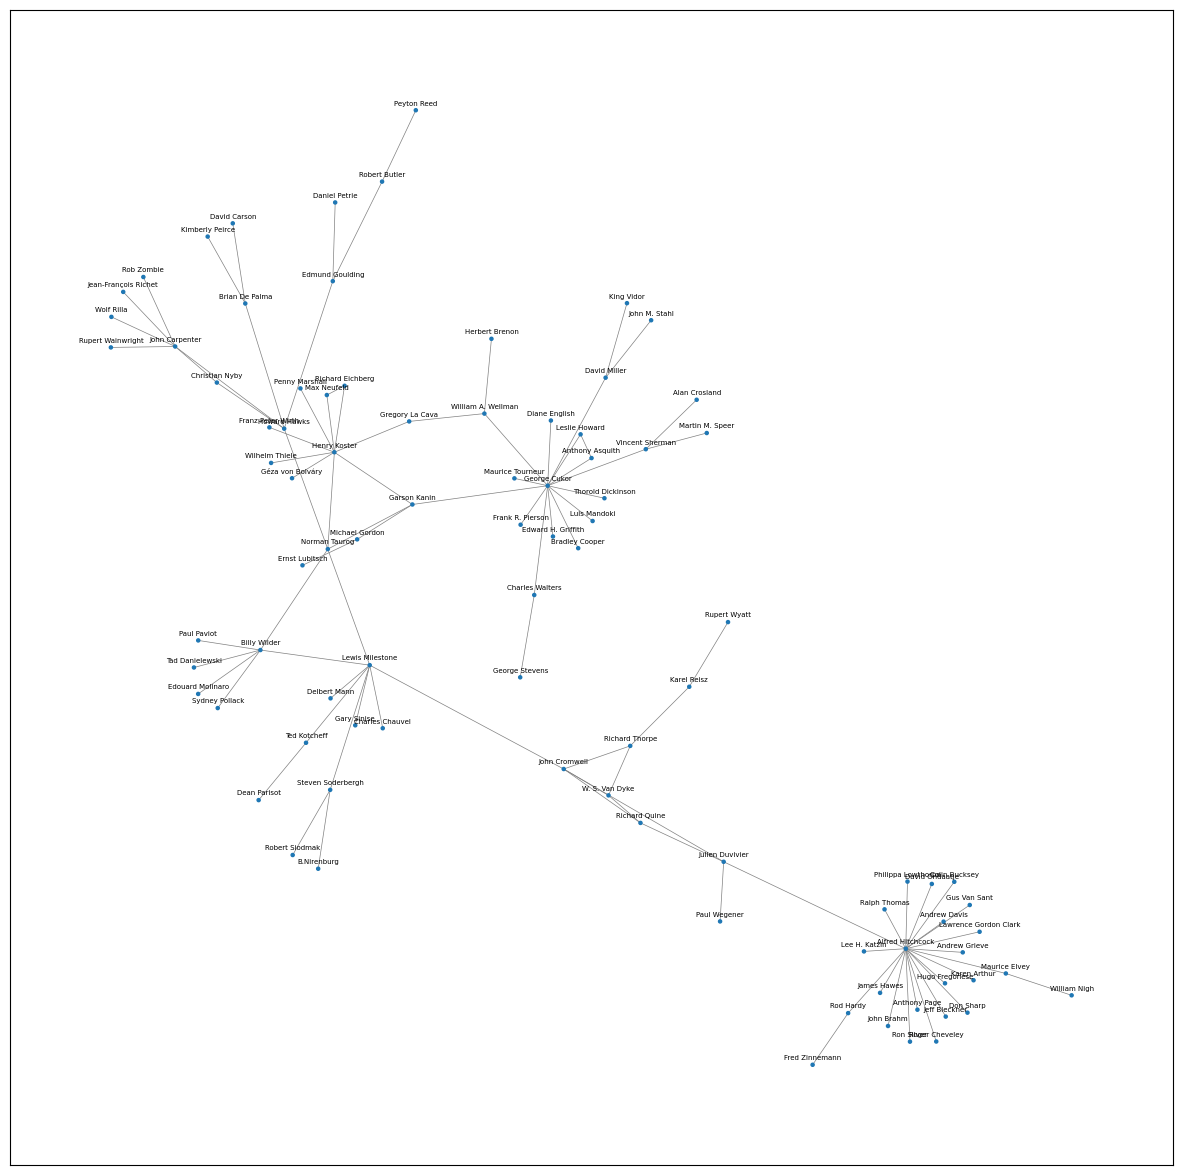

In [ ]:


plot_graph_networkx(X, nx.spring_layout(X), node_size=5, node_label_size = 5)

In [ ]:
import stellargraph as sg

In [ ]:
import matplotlib.pyplot as plt
from math import isclose
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from collections import Counter
import multiprocessing
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
G_2 = sg.StellarGraph.from_networkx(G)

In [ ]:
print(G_2.info())

StellarGraph: Undirected multigraph
 Nodes: 184, Edges: 187

 Node types:
  default: [184]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [187]
        Weights: all 1 (default)
        Features: none


## The Node2Vec algorithm

The Node2Vec algorithm introduced in  is a 2-step representation learning algorithm. The two steps are:

1. Use second-order random walks to generate sentences from a graph. A sentence is a list of node ids. The set of all sentences makes a corpus.

2. The corpus is then used to learn an embedding vector for each node in the graph. Each node id is considered a unique word/token in a dictionary that has size equal to the number of nodes in the graph. The Word2Vec algorithm is used for calculating the embedding vectors.


## Corpus generation using random walks

The stellargraph library provides an implementation for second-order random walks as required by Node2Vec. The random walks have fixed maximum length and are controlled by two parameters `p` and `q`. See for a detailed description of these parameters.

We are going to start 10 random walks from each node in the graph with a length up to 100. We set parameter `p` to 0.5 (which encourages backward steps) and `q` to 2.0 (which discourages distant steps); the net result is that walks should remain in the local vicinity of the starting nodes.

In [ ]:
from stellargraph.data import BiasedRandomWalk

rw = BiasedRandomWalk(G_2)

walks = rw.run(
    nodes=list(G_2.nodes()),  # root nodes
    length=50,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 1840


## Representation Learning using Word2Vec

We use the Word2Vec implementation in the free Python library gensim, to learn representations for each node in the graph. It works with `str` tokens, but the graph has integer IDs, so they're converted to `str` here.

We set the dimensionality of the learned embedding vectors to 128 as in.

In [ ]:
from gensim.models import Word2Vec

str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, window=5, min_count=0, sg=1, workers=2)

In [ ]:
# The embedding vectors can be retrieved from model.wv using the node ID.
model.wv

## Visualise Node Embeddings

We retrieve the Word2Vec node embeddings that are 128-dimensional vectors and then we project them down to 2 dimensions using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

In [ ]:
# Access the Word2VecKeyedVectors
word_vectors = model.wv

# Iterate through the vocabulary and print words and their vectors
for word in word_vectors.index2word:
    vector = word_vectors[word]
    print(f"Word: {word}, Vector: {vector}")

Word: Alfred Hitchcock, Vector: [ 3.24224196e-02 -6.69999123e-02  2.54784554e-01  1.90413669e-01
  5.12449503e-01  1.19282112e-01 -9.10010412e-02  8.27950984e-02
  1.77001655e-01 -5.52922547e-01  5.19927084e-01 -1.39562875e-01
 -1.70781761e-02 -1.16183795e-01  7.12949514e-01 -1.47689328e-01
 -6.65875077e-01 -8.95433128e-02 -6.76311627e-02  5.46006083e-01
 -1.43546954e-01 -1.99863702e-01  2.58931190e-01  1.74933866e-01
  2.30305210e-01 -2.88451821e-01 -3.96427304e-01 -7.30135888e-02
  4.24757212e-01  1.52526543e-01  3.49796265e-01  1.86027866e-02
 -5.76352738e-02  2.56738931e-01  3.56684208e-01  5.28737344e-02
 -6.06927015e-02  1.88454047e-01  1.59219518e-01 -1.72033995e-01
 -2.23322570e-01 -3.39180171e-01  4.90844846e-02  1.98477700e-01
  1.16223328e-01 -5.54495715e-02 -2.55177140e-01  6.61099628e-02
  2.07203284e-01  1.18810214e-01 -2.68549323e-01 -2.59382695e-01
 -5.88607788e-01  4.92143333e-01 -2.31856629e-01 -1.16271242e-01
  8.88540037e-03  6.53319135e-02  1.02355883e-01 -1.527197

Word: Gus Van Sant, Vector: [-0.0495762  -0.3796289  -0.02869363 -0.13880725  0.60193306 -0.11368289
 -0.02951272 -0.15739806  0.01554219 -0.8276034   0.22112377 -0.3561334
  0.07651474 -0.01664239  0.2911369  -0.32155734 -0.78364897 -0.45633295
 -0.25007957  0.6972157  -0.21194717 -0.1843141   0.29693964  0.04977842
 -0.28551263 -0.67307425  0.13509122  0.3985501   0.21092993 -0.16293381
  0.0282005  -0.33349666 -0.22548138  0.02521156  0.46196836 -0.08994816
  0.044479    0.6308721   0.01353811  0.18293324 -0.23072594 -0.26613146
  0.06132241  0.39292383  0.13666865 -0.3825695  -0.16646534 -0.13892636
  0.2468069   0.07067007 -0.03093791 -0.37211114 -0.9474148   0.5049053
  0.0031242   0.06114533  0.13028972  0.2829843  -0.14209408 -0.14414771
  0.3024208   0.4945924   0.21754982 -0.24958423 -0.01818782  0.24738747
  0.2690764  -0.5165218  -0.56318897  0.01362828  0.31588882 -0.7095545
  0.20155555  0.43761787  0.07783481 -0.19735248  0.7721573  -0.4820788
 -0.83731353  0.9519347   0

In [ ]:
#changed to index_to_key
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = model.wv.index2word

Transform the embeddings to 2d space for visualisation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

C:\Users\admin\Downloads\276\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\admin\Downloads\276\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


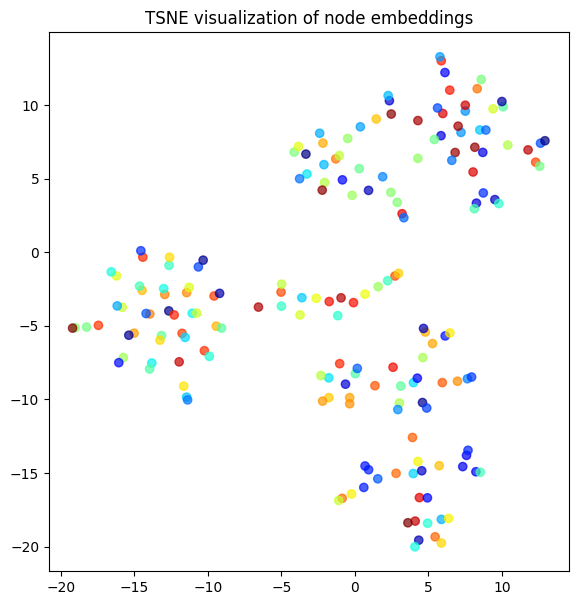

In [ ]:
# draw the embedding points, coloring them by the target label
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()